<a href="https://colab.research.google.com/github/vi-shruti/Kaggle/blob/master/TruckFI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import gc
import sys
import math

from pandas.io.json import json_normalize
from datetime import datetime

!pip install xlrd
import xlrd

import os

from pandas import Series, DataFrame, Panel
pd.set_option('display.max_rows',15)

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
gc.enable()

In [0]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%%time
df = pd.read_excel('../My Drive/PeopleNetFaultCodes20181206.xlsx')

CPU times: user 682 ms, sys: 51.5 ms, total: 734 ms
Wall time: 1.73 s


In [0]:
df.head()

,uniqkey,status,userstatus1,userstatus2,cid,insert_datetime,update_datetime,updatekey,o_version,o_type,o_cid,o_fctype,o_senddate_gmt,o_senddate_local,o_vehicle_number,o_vin,o_dsn,o_pfmdriverid,o_fcmid,o_fcpidsid,o_fccode,o_fcsa,o_fcspn,o_fcfmi,o_triggerdate_gmt,o_triggerdate_local,o_urgentflag,o_fcodometer,o_fcrpm,o_fcspeed,o_occurrencecount,o_cruisestatus,o_ignitionstatus,o_gpsquality,o_latitude,o_longitude,c_version,c_type,c_cid,c_fctype,c_senddate_gmt,c_senddate_local,c_vehicle_number,c_dsn,c_pfmdriverid,c_fcmid,c_fcpidsid,c_fccode,c_fcsa,c_fcspn,c_fcfmi,c_cleareddate_gmt,c_cleareddate_local,c_clearedactionid,c_clearedactiondesc
0,1543524341104,1,0,0,4477,2018-11-29 14:45:41,2018-12-06 15:20:20,1544131220232,1,Fault Codes,4477,2,2018-11-29 20:42:00,2018-11-29 14:42:00,940899,1XKDD49X6CJ333576,1674724,0,-1,-1,-1,49,2863,2,2018-11-29 20:41:57,2018-11-29 14:41:57,0,67262.0,1265,0.0,126,0,1,1,31.436558,-102.367120,1,Fault Codes,4477,3,2018-12-06 21:19:27,2018-12-06 15:19:27,940899,1674724,-1,-1,-1,-1,49,2863,2,2018-12-06 20:50:49,2018-12-06 14:50:49,1,AutoClear ...
1,1543533022129,1,0,0,4477,2018-11-29 17:10:22,2018-12-06 15:10:18,1544130618133,1,Fault Codes,4477,2,2018-11-29 23:10:07,2018-11-29 17:10:07,940416,1M2AX07Y8CM011445,1710074,0,-1,-1,-1,0,647,5,2018-11-29 20:52:26,2018-11-29 14:52:26,0,287351.1,647,2.0,1,0,1,1,35.423864,-99.910157,1,Fault Codes,4477,3,2018-12-06 21:10:10,2018-12-06 15:10:10,940416,1710074,-1,-1,-1,-1,0,647,5,2018-12-06 21:03:51,2018-12-06 15:03:51,1,AutoClear ...
2,1543533022175,1,0,0,4477,2018-11-29 17:10:22,2018-12-06 15:10:18,1544130618050,1,Fault Codes,4477,0,2018-11-29 23:10:07,2018-11-29 17:10:07,940416,1M2AX07Y8CM011445,1710074,0,128,1,33,-1,-1,5,2018-11-29 20:52:26,2018-11-29 14:52:26,0,287351.1,647,2.0,-1,0,1,1,35.423864,-99.910157,1,Fault Codes,4477,1,2018-12-06 21:10:10,2018-12-06 15:10:10,940416,1710074,-1,128,1,33,-1,-1,5,2018-12-06 21:03:51,2018-12-06 15:03:51,1,AutoClear ...
3,1543533022514,1,0,0,4477,2018-11-29 17:10:22,2018-12-06 15:10:18,1544130618223,1,Fault Codes,4477,2,2018-11-29 23:10:07,2018-11-29 17:10:07,940416,1M2AX07Y8CM011445,1710074,0,-1,-1,-1,0,975,3,2018-11-29 20:52:26,2018-11-29 14:52:26,0,287351.1,647,2.0,1,0,1,1,35.423864,-99.910157,1,Fault Codes,4477,3,2018-12-06 21:10:10,2018-12-06 15:10:10,940416,1710074,-1,-1,-1,-1,0,975,3,2018-12-06 21:03:51,2018-12-06 15:03:51,1,AutoClear ...
4,1543533022464,1,0,0,4477,2018-11-29 17:10:22,2018-12-06 15:10:17,1544130617816,1,Fault Codes,4477,0,2018-11-29 23:10:07,2018-11-29 17:10:07,940416,1M2AX07Y8CM011445,1710074,0,128,0,26,-1,-1,3,2018-11-29 20:52:26,2018-11-29 14:52:26,0,287351.1,647,2.0,-1,0,1,1,35.423864,-99.910157,1,Fault Codes,4477,1,2018-12-06 21:10:10,2018-12-06 15:10:10,940416,1710074,-1,128,0,26,-1,-1,3,2018-12-06 21:03:51,2018-12-06 15:03:51,1,AutoClear ...


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 55 columns):
uniqkey                1000 non-null int64
status                 1000 non-null int64
userstatus1            1000 non-null int64
userstatus2            1000 non-null int64
cid                    1000 non-null int64
insert_datetime        1000 non-null datetime64[ns]
update_datetime        1000 non-null datetime64[ns]
updatekey              1000 non-null int64
o_version              1000 non-null int64
o_type                 1000 non-null object
o_cid                  1000 non-null int64
o_fctype               1000 non-null int64
o_senddate_gmt         1000 non-null datetime64[ns]
o_senddate_local       1000 non-null datetime64[ns]
o_vehicle_number       1000 non-null object
o_vin                  1000 non-null object
o_dsn                  1000 non-null int64
o_pfmdriverid          1000 non-null int64
o_fcmid                1000 non-null int64
o_fcpidsid             1000 non-null i

In [0]:
df.isna().any()

uniqkey                False
status                 False
userstatus1            False
userstatus2            False
cid                    False
insert_datetime        False
update_datetime        False
                       ...  
c_fcsa                 False
c_fcspn                False
c_fcfmi                False
c_cleareddate_gmt      False
c_cleareddate_local    False
c_clearedactionid      False
c_clearedactiondesc    False
Length: 55, dtype: bool

In [0]:
df_train = df.drop(labels = 'status', axis = 1)

droplist = ['userstatus1', 'userstatus2', 'cid', 'o_version', 'o_type', 'o_cid', 'o_urgentflag', 'o_ignitionstatus', 'c_version', 'c_type', 'c_cid', 'c_pfmdriverid', 'c_clearedactionid', 'c_clearedactiondesc']
df_train = df_train.drop(labels = droplist, axis = 1)

In [0]:
df_train.head()

,uniqkey,insert_datetime,update_datetime,updatekey,o_fctype,o_senddate_gmt,o_senddate_local,o_vehicle_number,o_vin,o_dsn,o_pfmdriverid,o_fcmid,o_fcpidsid,o_fccode,o_fcsa,o_fcspn,o_fcfmi,o_triggerdate_gmt,o_triggerdate_local,o_fcodometer,o_fcrpm,o_fcspeed,o_occurrencecount,o_cruisestatus,o_gpsquality,o_latitude,o_longitude,c_fctype,c_senddate_gmt,c_senddate_local,c_vehicle_number,c_dsn,c_fcmid,c_fcpidsid,c_fccode,c_fcsa,c_fcspn,c_fcfmi,c_cleareddate_gmt,c_cleareddate_local
0,1543524341104,2018-11-29 14:45:41,2018-12-06 15:20:20,1544131220232,2,2018-11-29 20:42:00,2018-11-29 14:42:00,940899,1XKDD49X6CJ333576,1674724,0,-1,-1,-1,49,2863,2,2018-11-29 20:41:57,2018-11-29 14:41:57,67262.0,1265,0.0,126,0,1,31.436558,-102.367120,3,2018-12-06 21:19:27,2018-12-06 15:19:27,940899,1674724,-1,-1,-1,49,2863,2,2018-12-06 20:50:49,2018-12-06 14:50:49
1,1543533022129,2018-11-29 17:10:22,2018-12-06 15:10:18,1544130618133,2,2018-11-29 23:10:07,2018-11-29 17:10:07,940416,1M2AX07Y8CM011445,1710074,0,-1,-1,-1,0,647,5,2018-11-29 20:52:26,2018-11-29 14:52:26,287351.1,647,2.0,1,0,1,35.423864,-99.910157,3,2018-12-06 21:10:10,2018-12-06 15:10:10,940416,1710074,-1,-1,-1,0,647,5,2018-12-06 21:03:51,2018-12-06 15:03:51
2,1543533022175,2018-11-29 17:10:22,2018-12-06 15:10:18,1544130618050,0,2018-11-29 23:10:07,2018-11-29 17:10:07,940416,1M2AX07Y8CM011445,1710074,0,128,1,33,-1,-1,5,2018-11-29 20:52:26,2018-11-29 14:52:26,287351.1,647,2.0,-1,0,1,35.423864,-99.910157,1,2018-12-06 21:10:10,2018-12-06 15:10:10,940416,1710074,128,1,33,-1,-1,5,2018-12-06 21:03:51,2018-12-06 15:03:51
3,1543533022514,2018-11-29 17:10:22,2018-12-06 15:10:18,1544130618223,2,2018-11-29 23:10:07,2018-11-29 17:10:07,940416,1M2AX07Y8CM011445,1710074,0,-1,-1,-1,0,975,3,2018-11-29 20:52:26,2018-11-29 14:52:26,287351.1,647,2.0,1,0,1,35.423864,-99.910157,3,2018-12-06 21:10:10,2018-12-06 15:10:10,940416,1710074,-1,-1,-1,0,975,3,2018-12-06 21:03:51,2018-12-06 15:03:51
4,1543533022464,2018-11-29 17:10:22,2018-12-06 15:10:17,1544130617816,0,2018-11-29 23:10:07,2018-11-29 17:10:07,940416,1M2AX07Y8CM011445,1710074,0,128,0,26,-1,-1,3,2018-11-29 20:52:26,2018-11-29 14:52:26,287351.1,647,2.0,-1,0,1,35.423864,-99.910157,1,2018-12-06 21:10:10,2018-12-06 15:10:10,940416,1710074,128,0,26,-1,-1,3,2018-12-06 21:03:51,2018-12-06 15:03:51


In [0]:
df_train.columns.value_counts

<bound method IndexOpsMixin.value_counts of Index(['uniqkey', 'insert_datetime', 'update_datetime', 'updatekey',
       'o_fctype', 'o_senddate_gmt', 'o_senddate_local', 'o_vehicle_number',
       'o_vin', 'o_dsn', 'o_pfmdriverid', 'o_fcmid', 'o_fcpidsid', 'o_fccode',
       'o_fcsa', 'o_fcspn', 'o_fcfmi', 'o_triggerdate_gmt',
       'o_triggerdate_local', 'o_fcodometer', 'o_fcrpm', 'o_fcspeed',
       'o_occurrencecount', 'o_cruisestatus', 'o_gpsquality', 'o_latitude',
       'o_longitude', 'c_fctype', 'c_senddate_gmt', 'c_senddate_local',
       'c_vehicle_number', 'c_dsn', 'c_fcmid', 'c_fcpidsid', 'c_fccode',
       'c_fcsa', 'c_fcspn', 'c_fcfmi', 'c_cleareddate_gmt',
       'c_cleareddate_local'],
      dtype='object')>

In [0]:
colsval = ['o_fctype', 'o_vehicle_number',
       'o_vin', 'o_dsn', 'o_pfmdriverid', 'o_fcmid', 'o_fcpidsid', 'o_fccode',
       'o_fcsa', 'o_fcspn', 'o_fcfmi', 'o_fcodometer', 'o_fcrpm', 'o_fcspeed',
       'o_occurrencecount', 'o_cruisestatus', 'o_gpsquality', 'o_latitude',
       'o_longitude', 'c_fctype', 'c_vehicle_number', 'c_dsn', 'c_fcmid', 'c_fcpidsid', 'c_fccode',
       'c_fcsa', 'c_fcspn', 'c_fcfmi', 'c_cleareddate_gmt',
       'c_cleareddate_local']
for cols in colsval:
  print(df_train[cols].value_counts())

2    806
0    194
Name: o_fctype, dtype: int64
940894     43
940945     32
940963     26
941239     23
940960     22
940931     21
940399     19
           ..
923930      1
940830      1
9436961     1
9436963     1
9436971     1
9436972     1
940052      1
Name: o_vehicle_number, Length: 218, dtype: int64
1XKDD40XXCJ323629       41
                        37
1XKDD49X2CJ333543       32
1XKDD49X7CJ333506       26
1NKDL40X2EJ403913       23
1XKDD49X1CJ333503       22
1XKDD49X8CJ333529       21
                        ..
1M2AG11Y37M066499        1
1XPTD40X7GD319578        1
1XKDD49X9CJ333491        1
1M2AG11C87M068043        1
1XPWD49X3DD197376        1
1M1AW09Y1CM018726        1
1M2AX07Y4CM011457        1
Name: o_vin, Length: 204, dtype: int64
1657133    41
1709632    32
1676170    26
1676281    23
1672669    22
1709373    21
1673170    19
           ..
1661235     1
1709380     1
1709381     1
1660276     1
1660280     1
1708422     1
1709525     1
Name: o_dsn, Length: 219, dtype: int64


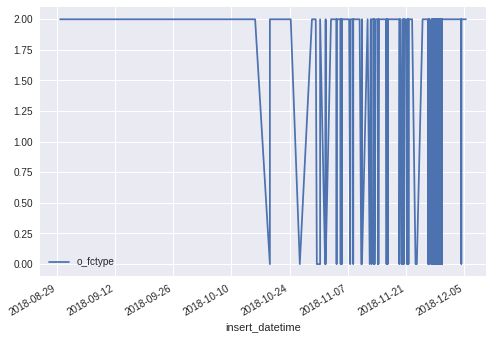

In [0]:
df_train.plot(x='insert_datetime', y='o_fctype')

In [0]:
df_train_fctype = df_train[df_train.o_fctype == 0].insert_datetime.dt.date
#df_train_fctype.head()
#df_train_fctype.value_counts()

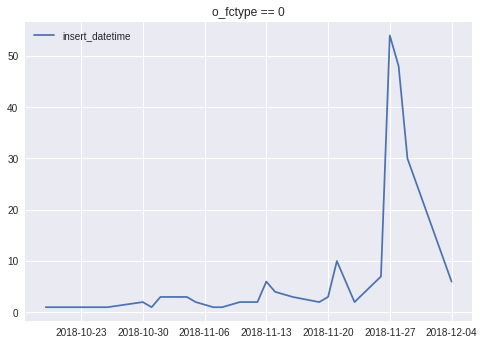

In [0]:
df_train_fctype.value_counts().plot(title='o_fctype == 0', legend=True)

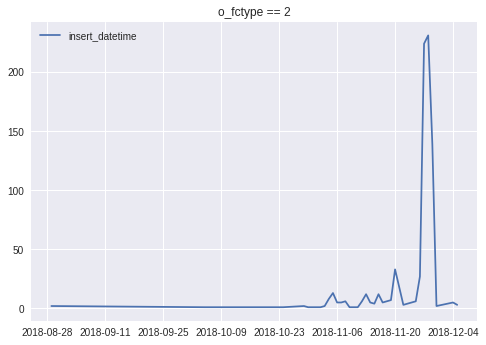

In [0]:
df_train_fctype = df_train[df_train.o_fctype == 2].insert_datetime.dt.date
#df_train_fctype.head()
#df_train_fctype.value_counts()
df_train_fctype.value_counts().plot(title='o_fctype == 2', legend=True)

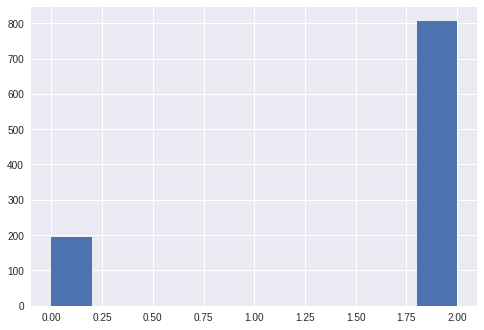

In [0]:
df_train['o_fctype'].hist()

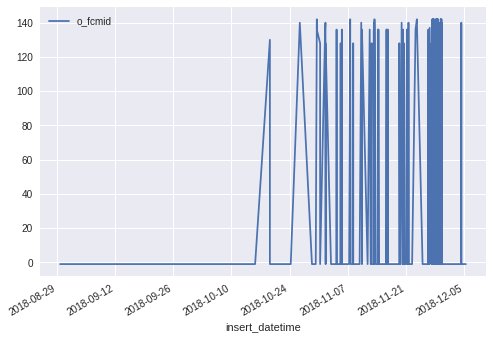

In [0]:
df_train.plot(x='insert_datetime', y='o_fcmid')

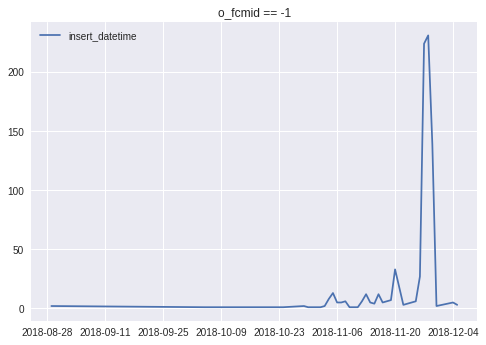

In [0]:
df_train_fcmid = df_train[df_train.o_fcmid == -1].insert_datetime.dt.date
#df_train_fctype.head()
#df_train_fctype.value_counts()
df_train_fcmid.value_counts().plot(title='o_fcmid == -1', legend=True)

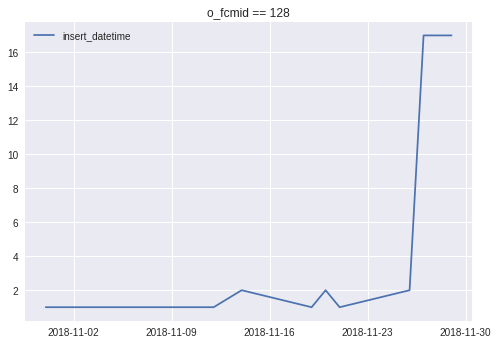

In [0]:
df_train_fcmid = df_train[df_train.o_fcmid == 128].insert_datetime.dt.date
df_train_fcmid.value_counts().plot(title='o_fcmid == 128', legend=True)

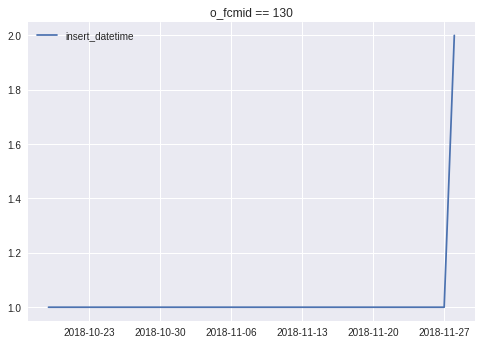

In [0]:
df_train_fcmid = df_train[df_train.o_fcmid == 130].insert_datetime.dt.date
df_train_fcmid.value_counts().plot(title='o_fcmid == 130', legend=True)

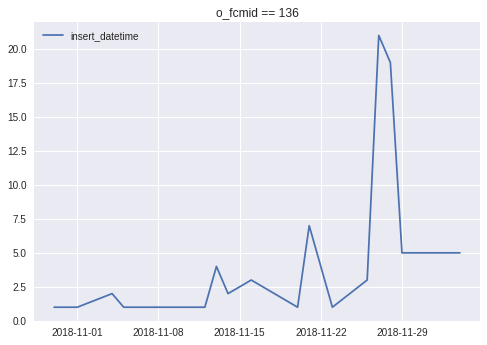

In [0]:
df_train_fcmid = df_train[df_train.o_fcmid == 136].insert_datetime.dt.date
df_train_fcmid.value_counts().plot(title='o_fcmid == 136', legend=True)

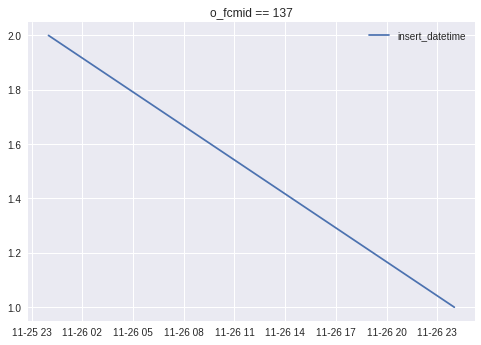

In [0]:
df_train_fcmid = df_train[df_train.o_fcmid == 137].insert_datetime.dt.date
df_train_fcmid.value_counts().plot(title='o_fcmid == 137', legend=True)

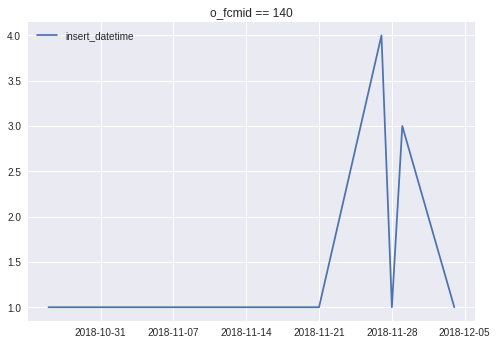

In [0]:
df_train_fcmid = df_train[df_train.o_fcmid == 140].insert_datetime.dt.date
df_train_fcmid.value_counts().plot(title='o_fcmid == 140', legend=True)

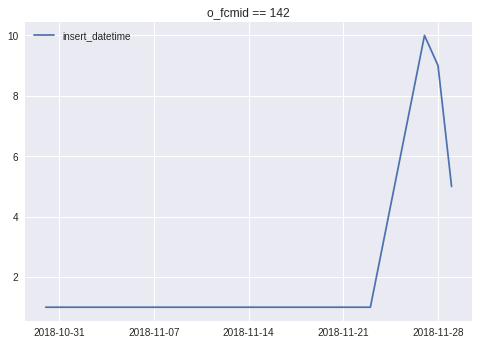

In [0]:
df_train_fcmid = df_train[df_train.o_fcmid == 142].insert_datetime.dt.date
df_train_fcmid.value_counts().plot(title='o_fcmid == 142', legend=True)

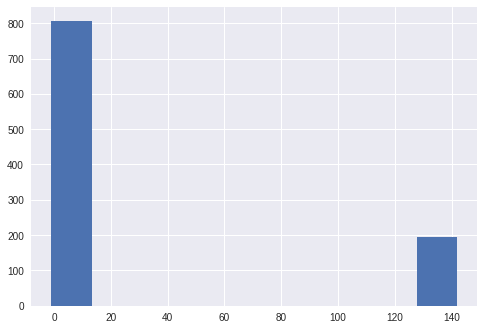

In [0]:
df_train['o_fcmid'].hist()

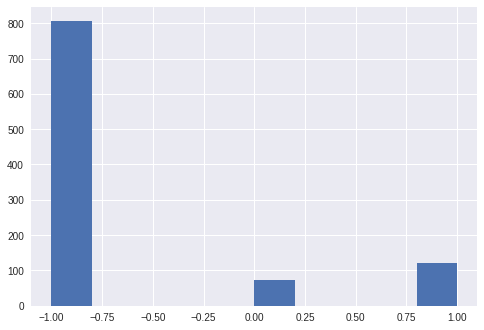

In [0]:
df_train['o_fcpidsid'].hist()

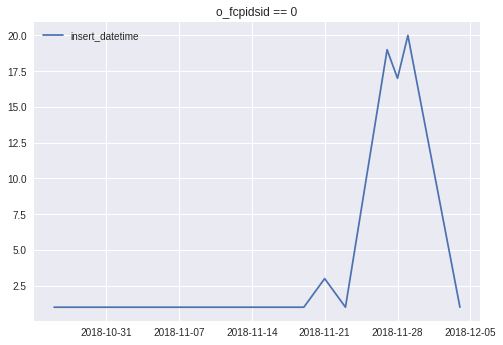

In [0]:
df_train_fcmid = df_train[df_train.o_fcpidsid == 0].insert_datetime.dt.date
df_train_fcmid.value_counts().plot(title='o_fcpidsid == 0', legend=True)

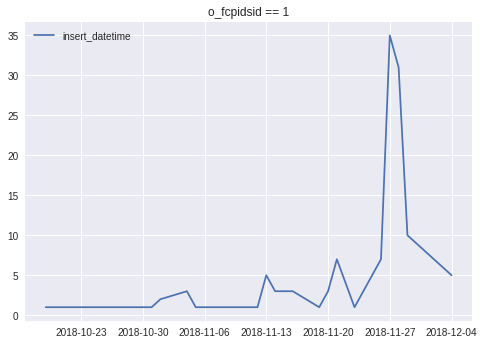

In [0]:
df_train_fcmid = df_train[df_train.o_fcpidsid == 1].insert_datetime.dt.date
df_train_fcmid.value_counts().plot(title='o_fcpidsid == 1', legend=True)

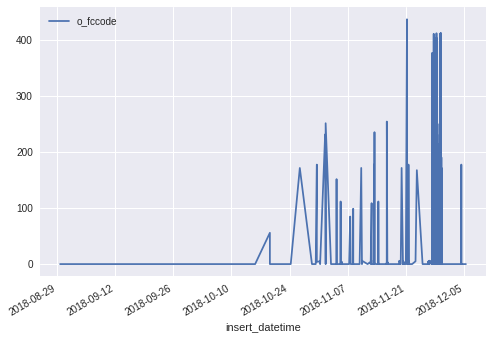

In [0]:
df_train.plot(x='insert_datetime', y='o_fccode')

In [0]:
#df_train_fcmid = df_train[df_train.o_fcmid == -1].insert_datetime.dt.date
#df_train_fctype.head()
#df_train_fcmid.value_counts().plot(title='o_fcmid == -1', legend=True)

#df_train.o_fccode.value_counts()
df_train.o_fccode.unique()

array([ -1,  33,  26, 171,  96, 235,   3,   4, 190, 111, 153,   1, 412,
         5,  84, 177,  98,  80,  79,  55, 411,   2, 385, 211,  23,  97,
       151,   6, 214, 172, 250, 167, 231,  60,  94, 152, 102, 404,  18,
        89, 437,   8,   7,   9, 254, 108, 154,  21, 103, 168, 251, 246,
       377, 173,  11,  12])

In [0]:
"""plt.figure(1)
for code in df_train.o_fccode.unique():
  df_train_fcmid = df_train[df_train.o_fccode == code].insert_datetime.dt.date
  plt.subplot(2,2,i)
  df_train_fcmid.value_counts().plot(title='o_fccode == ', legend=True)"""

"plt.figure(1)\nfor code in df_train.o_fccode.unique():\n  df_train_fcmid = df_train[df_train.o_fccode == code].insert_datetime.dt.date\n  plt.subplot(2,2,i)\n  df_train_fcmid.value_counts().plot(title='o_fccode == ', legend=True)"

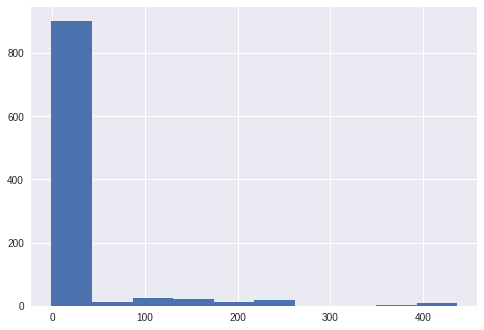

In [0]:
df_train['o_fccode'].hist()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f6443cf28>],
      dtype=object)

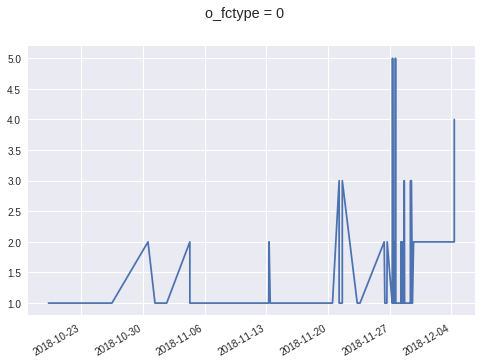

In [0]:
df_train[df_train.o_fctype == 0].insert_datetime.value_counts().plot(kind='line',subplots=True,sharex=True,sharey=True,title='o_fctype = 0')

In [0]:
freq_o_fctype0 = df_train[df_train.o_fctype == 0].insert_datetime.value_counts().tolist()
#freq_o_fctype0

In [0]:
def CountFrequency(my_list): 
    # Creating an empty dictionary  
    freq = {} 
    for items in my_list: 
        freq[items] = my_list.count(items) 
      
    for key, value in freq.items(): 
        print ("% d : % d"%(key, value))

In [0]:
freq_o_fctype0_plt = CountFrequency(freq_o_fctype0)

 5 :  2
 4 :  1
 3 :  7
 2 :  20
 1 :  119


In [0]:
df_train[df_train.o_fctype == 0].insert_datetime.value_counts().to_csv('../My Drive/o_fctype0.csv')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f643402e8>],
      dtype=object)

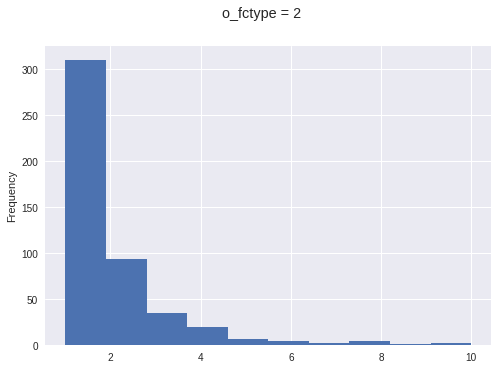

In [0]:
df_train[df_train.o_fctype == 2].insert_datetime.value_counts().plot(kind='hist',subplots=True,sharex=True,sharey=True,title='o_fctype = 2')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f643217b8>],
      dtype=object)

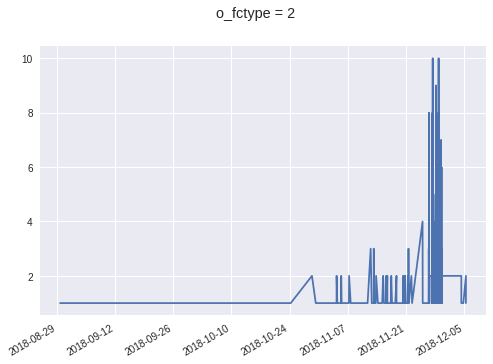

In [0]:
df_train[df_train.o_fctype == 2].insert_datetime.value_counts().plot(kind='line',subplots=True,sharex=True,sharey=True,title='o_fctype = 2')

In [0]:
#df_o_fctype2.o_fctype.value_counts()
#df_o_fctype2.to_csv('../My Drive/o_fctype2.csv')

1.	Analysis
a.	Fault Code > by fn. of time > for all trucks > sum(occurrences)
b.	ML: Poisson distribution for probability calculation
c.	Analyze ML: Statistically more likely faults from mean
2.	How important which codes are?
a.	Available only for o_fctype is 0
i.	Plot histogram vs. time
3.	What analytics can we provide to better manage their fleet?
4.	Can they improve data quality?
a.	By bringing in some external additional data
b.	Weather-api: Augment the data by bringing in weather
c.	Road data: like asphalt as material etc.
d.	GPS data
e.	Traffic
5.	See if we can generate some data.
6.	o_fcmid – patterns: if frequency different, use it to generate synthetic data
a.	Gaussian looking distribution
7.	Reason for fault code to occur. E.g. speed, RPM
8.	When creating the plots, create a .csv file (import for CogniSteward)
9.	Plot few trucks that are outliers.
For each vehicle, find the timeline of failures of the same part (failure ID is how far apart in time?).


In [0]:
df_train.o_vehicle_number.unique()

array([940899, 940416, 940747, 940968, 940963, 9436979, 940394, 940362,
       9495471, 940721, 9489538, 941226, 941039, 941038, 940950, 940955,
       9420038, 9436801, 941012, 941220, 940966, 940425, 940384, 940921,
       940387, 923884, 941045, 940960, 922475, 940763, 922460, 922532,
       940390, 940973, 940378, 923957, 923923, 9495469, 9495343, 923860,
       941013, 941005, 941026, 940830, 941233, 923949, 923293, 9436963,
       9436967, 923922, 940775, 923944, 9420029, 940745, 9436906, 9437021,
       940389, 9436893, 940052, 940952, 940922, 923930, 941222, 9497376,
       922457, 941008, 940772, 923875, 940981, 922564, 941010, 940914,
       9436856, 940974, 923945, 9495221, 940357, 9436974, 9494854, 941006,
       923897, 9436971, 940998, 940909, 940894, 9436993, 940464, 940902,
       941022, 940422, 923921, 9436912, 940364, 923467, 941029, 9436871,
       9488457, 923932, 940379, 923912, 940358, 923915, 940945, 9495348,
       941046, 941001, 941023, 923910, 923929, 941082

In [0]:
#for vehicle in df_train.o_vehicle_number.unique()
#df_train.boxplot(cloumn = '')

In [0]:
for vehicle in df_train.o_vehicle_number.unique().tolist()
  for fcmid in df_train[vehicle].value_counts()
    print(fcmid)

SyntaxError: ignored